<a href="https://colab.research.google.com/github/suremmieyy/Linear-Regression-Model/blob/main/Linear_Regression_Model_ASSIGN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import joblib



In [ ]:
#display the dataset
df = pd.read_csv('/content/Road Traffic accidents.csv', encoding='latin-1')
df = df.dropna()
df.head()


,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,3309,429093,436258,1,01-Jan-09,55,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,2609,434723,435534,1,02-Jan-09,2335,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,2809,441173,433047,1,02-Jan-09,1645,Unclassified,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,3809,428487,431364,1,02-Jan-09,1723,A,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,3909,425928,435480,2,02-Jan-09,1350,Unclassified,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [ ]:
label_encoders = {}
categorical_columns = ['1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Sex of Casualty', 'Type of Vehicle']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

le_casualty = LabelEncoder()
df['Casualty Severity'] = le_casualty.fit_transform(df['Casualty Severity'])
label_encoders['Casualty Severity'] = le_casualty

X = df[['Easting', 'Northing', 'Number of Vehicles', '1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Type of Vehicle']]
y = df['Casualty Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.11003704192867478


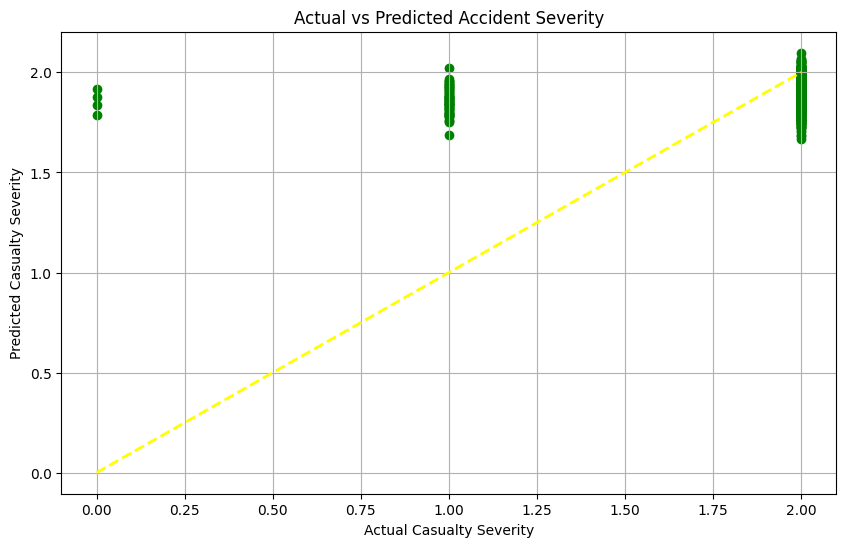

In [ ]:
#actual vs predicted casualty severity
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='green', alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='yellow', linestyle='--', linewidth=2)
plt.xlabel("Actual Casualty Severity")
plt.ylabel("Predicted Casualty Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.grid(True)
plt.show()

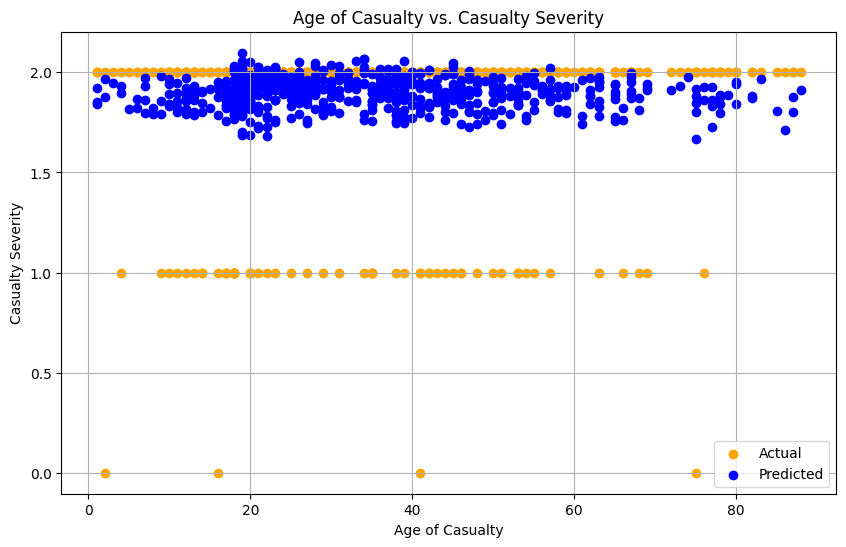

In [ ]:
#Age of casualty and casualty severity
plt.figure(figsize=(10,6))
plt.scatter(X_test['Age of Casualty'], y_test, color='orange', alpha=1, label='Actual')
plt.scatter(X_test['Age of Casualty'], y_pred, color='blue', alpha=1, label='Predicted')
plt.xlabel("Age of Casualty")
plt.ylabel("Casualty Severity")
plt.title("Age of Casualty vs. Casualty Severity")
plt.legend()
plt.grid(True)
plt.show()


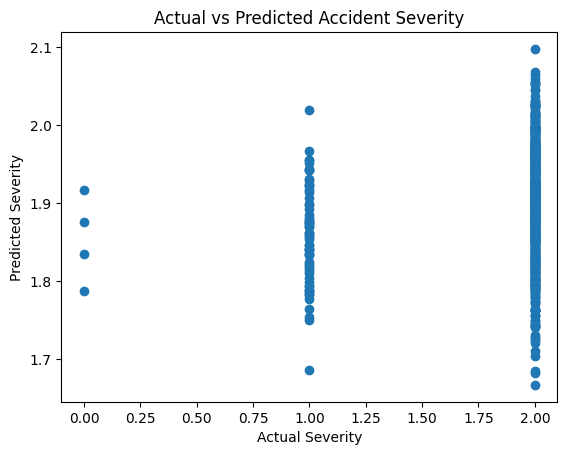

In [ ]:
#predicted against actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Severity")
plt.ylabel("Predicted Severity")
plt.title("Actual vs Predicted Accident Severity")
plt.show()

In [ ]:
#Save the model
joblib.dump(model, 'linear_regression_accident_model.pkl')

['linear_regression_accident_model.pkl']

In [ ]:
#example
columns = ['Easting', 'Northing', 'Number of Vehicles', '1st Road Class', 'Road Surface',
           'Lighting Conditions', 'Weather Conditions', 'Casualty Class', 'Sex of Casualty',
           'Age of Casualty', 'Type of Vehicle']
example_data = pd.DataFrame(np.array([[429000, 436000, 2, 0, 1, 3, 0, 1, 0, 25, 1]]), columns=columns)
severity_prediction = model.predict(example_data)
print(f"Predicted accident severity for the hypothetical example: {severity_prediction}")

Predicted accident severity for the hypothetical example: [1.9049955]
